<img src="https://1.bp.blogspot.com/-QdumdOczeco/X9Fx3wTEVdI/AAAAAAAAG4Q/efRt8CO65iUyLlBIyp5MaaTNUk4Qy0xFQCLcBGAsYHQ/s762/image4.gif">


#  The Research problem.
- Most of deaf children born to hearing parents with no knowldge of ASL are highly at risk of language deprivation syndrome.learning ASL is time consuming and most parents work long hours and some of them do not have resources to attend classes or access learning material.To assist the language and communication abilities of deaf children and their families it is crucial to create efficient and available ASL learning resources. About 94477 vidoes were collected and the language signs was defined according to it's accurate video. This collected data will be used on development of effective and accessible ASL learning tools to support language development and communication skills for deaf children.

## Understanding the problem.
- About 94477 videos where collected and language was defined according to its video. This collected data will be used onthe development of effective and accessible ASL learning tools to support the language development and communication skills of deaf children.

### The aim
- To developa high perfoming model for PopSign game that accuratly classifies isolated ASL signs using the videos given inthe data

## Hypothesis
- LEVEL OF PROFICIENCY .Develop the level of proficiency in ASL.This will cater to learners of all levels and allow them to progress in their own pace _Socio_econimic status Currently we are not sure

- Vocabulary .we need to enrich the app with more words and improve vocabulary

- Graphic .improve graphic perfomance so that videoscan be clear so it will cater for also people who color_blind

- Social interaction .social interaction between learners ,this can include features such as chat rooms or forums where learners can communicate with each other and practice their signing skills

# Understanding the data
- This data is related to American sign language and the specific sign video of a particular word

- Path-------------------- The path to the landmark file.

- Participant_id-----------A unique identifier for the data contributor.

- Sequence_id -------------A unique identifier for the landmark sequence.

- Sign---------------------The label for the landmark sequenc

# Library 

In [1]:
#  Core Libraries
import os                      # For file and directory operations
import random                  # For random sampling and reproducibility control
from pathlib import Path       # For handling file system paths in a clean way

# Data Handling & Processing
import numpy as np             # Numerical operations and array manipulation
import pandas as pd            # Data manipulation and analysis (DataFrames)
import polars as pl            # High-performance DataFrame library (optional alternative to pandas)

# Computer Vision
import cv2                     # OpenCV for image and video processing

# Visualization
import matplotlib.pyplot as plt        # Static plotting
import matplotlib as mpl               # Matplotlib configurations
from matplotlib.animation import FuncAnimation, ArtistAnimation  # For animations
import plotly.graph_objects as go      # Interactive plots (low-level API)
import plotly.express as px            # Quick interactive plots

# Interactive & Notebook Display
from ipywidgets import interact, IntSlider  # Interactive sliders in Jupyter
from IPython.display import HTML, display   # Render animations and HTML in notebooks

# Inspaction 

In [2]:
# Loop through all folders inside the Kaggle input directory
for folder in os.listdir("/kaggle/input"):
    # Print the folder name (usually the dataset name)
    print(folder)
    # Print the files and subfolders inside each dataset folder
    print(os.listdir(f"/kaggle/input/{folder}"))

asl-signs
['sign_to_prediction_index_map.json', 'train.csv', 'train_landmark_files']


In [3]:
import polars as pl

train = pl.read_csv("/kaggle/input/asl-signs/train.csv")

In [4]:
# Count the number of missing (null) values in each column of the Polars DataFrame
train.select(
    pl.all().null_count()
)

path,participant_id,sequence_id,sign
u32,u32,u32,u32
0,0,0,0


In [5]:
#checking the datatype of column
train.dtypes

[String, Int64, Int64, String]



**OBSERVATION**

    The data show that there are two data types which are objects and integers.
    participant_id and sequence_id they are of integer type and sign and path they are of object type



In [6]:
# Print the shape of the dataset (rows, columns)
print("Shape:", train.shape)

# Print all column names
print("\nColumns:", train.columns)

# Print the schema (column names with their data types)
print("\nSchema:", train.schema)

Shape: (94477, 4)

Columns: ['path', 'participant_id', 'sequence_id', 'sign']

Schema: Schema({'path': String, 'participant_id': Int64, 'sequence_id': Int64, 'sign': String})


In [7]:
INPUT = Path("/kaggle/input/asl-signs")

train = pl.read_csv(INPUT / "train.csv")

# Convert to pandas for easier aggre/gation with plotly
train_pd = train.to_pandas()

# Count number of sequences per sign
seq_count = train_pd.groupby("sign")["sequence_id"].count()

meta_data_df = pd.DataFrame({
    "Sequences": seq_count
})

meta_data_df = meta_data_df.sort_values("Sequences", ascending=False)
meta_data_df.head()


,Sequences
sign,
listen,415
look,414
shhh,411
donkey,410
mouse,408


In [8]:
# Checking the name of the data frame different sign.
train['sign'].unique()

sign
str
"""shirt"""
"""lion"""
"""helicopter"""
"""because"""
"""dog"""
…
"""if"""
"""yesterday"""
"""stay"""


**OBSERVATION**

    Base onthe data there are 250 unique sign that where recorded


In [9]:
# Create an empty Plotly figure
fig = go.Figure()

# Get column names from metadata DataFrame
cols_name = meta_data_df.columns.values.tolist()

# Define custom colors for each trace
colors = ["#0F9D58", "#4285F4", "#F4B400"]

# Loop through each column and corresponding color
for color, col in zip(colors, cols_name):
    
    # Sort values by the current column
    tmp = meta_data_df.sort_values(col)
    
    # Add a bar trace for each column
    fig.add_trace(
        go.Bar(
            x=tmp.index,          # Sign labels (index)
            y=tmp[col],           # Corresponding values
            width=0.5,
            name=col,
            marker_color=color
        )
    )

# Update layout settings
fig.update_layout(
    
    # Main title configuration
    title={
        'text': "ISL Distribution: All Traces",
        'font': dict(size=20, family="Georgia", color=colors[1]),
        'y': 0.87,
        'x': 0.035,
        'xanchor': 'left',
        'yanchor': 'top'
    },
    
    template="plotly_white",     # Clean white theme
    xaxis_tickangle=-45,         # Rotate x-axis labels
    width=4000,                  # Large figure width
    
    # Axis labels and locking zoom
    xaxis=dict(title='Sign', fixedrange=True),
    yaxis=dict(title='Count', fixedrange=True),
    
    showlegend=True,
    
    # Dropdown menu for interactive trace control
    updatemenus=[
        dict(
            active=0,
            direction="down",
            pad={"r": 50, "t": 25},
            showactive=True,
            x=0.005,
            xanchor="right",
            y=1.2,
            yanchor="top",
            
            buttons=list([
                
                # Show all traces
                dict(
                    label="All",
                    method="update",
                    args=[
                        {"visible": [True, True, True]},
                        {"title": "ISL Distribution: All Traces"}
                    ]
                ),
                
                # Show only Sequences
                dict(
                    label="Sequences",
                    method="update",
                    args=[
                        {"visible": [True, False, False]},
                        {"title": "Distribution of Number of Sequences per Sign"}
                    ]
                ),
                
                # Show only Frames
                dict(
                    label="Frames",
                    method="update",
                    args=[
                        {"visible": [False, True, False]},
                        {"title": "Distribution of Number of Frames per Sign"}
                    ]
                ),
                
                # Show only Average Frames
                dict(
                    label="Avg frames",
                    method="update",
                    args=[
                        {"visible": [False, False, True]},
                        {"title": "Distribution of Average Frames per Sequence per Sign"}
                    ]
                ),
            ]),
        ),
    ]
)

# Display the interactive figure without the mode bar
fig.show(config=dict(displayModeBar=False))

## Observations – ISL Distribution Plot

- The dataset appears **well balanced across signs**, with each sign having a very similar number of samples.
- Most signs range approximately between **300 and 370 sequences**, indicating low class imbalance.
- There is no extreme outlier class with significantly higher or lower frequency.
- The distribution is slightly increasing from left to right due to sorting, not due to imbalance.
- This balanced structure is beneficial for training classification models, as it reduces bias toward dominant classes.
- Minimal need for aggressive resampling techniques (e.g., oversampling or class weighting).
- The dataset is suitable for fair evaluation using standard metrics like accuracy or macro F1-score.

# Landmark Detection

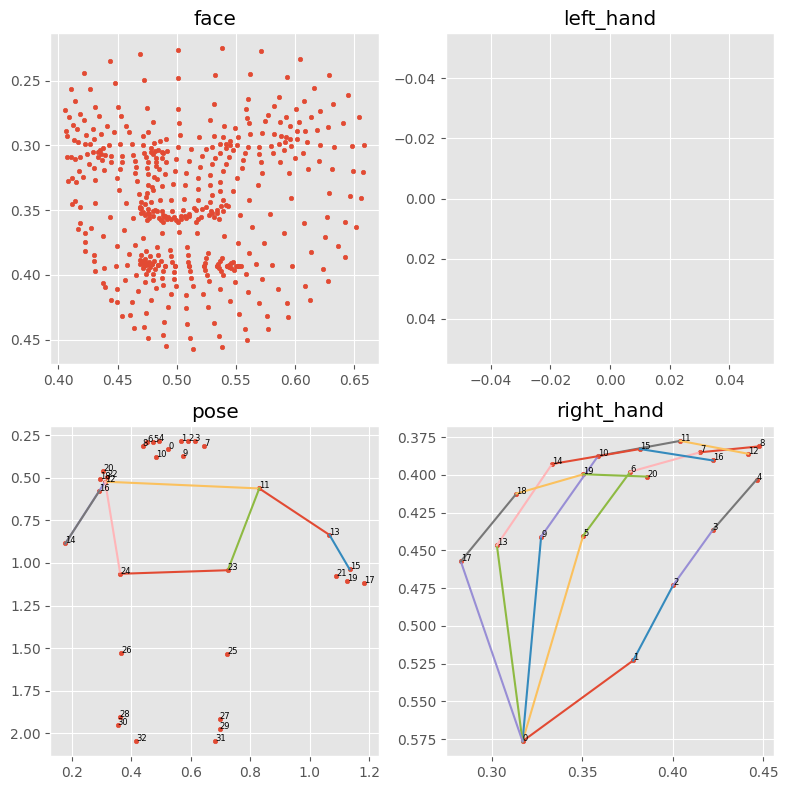

In [10]:
# Use ggplot style for better visualization aesthetics
plt.style.use("ggplot")

# Define dataset path
INPUT = Path("/kaggle/input/asl-signs")

# Read the training metadata file (train.csv)
train = pl.read_csv(INPUT / "train.csv")

# Extract first sample row as dictionary (contains parquet path)
lm_data = {k: v for k, v in zip(train.columns, train.row(0))}

# Read corresponding landmark parquet file
df_landmark = pl.read_parquet(INPUT / lm_data["path"])

# Get the first actual frame ID (important to avoid missing frames)
first_frame_id = df_landmark["frame"].unique().sort()[0]

# Filter landmarks for that first frame only
lm_first_frame = df_landmark.filter(pl.col("frame") == first_frame_id)

# Split landmarks into groups (face, pose, left_hand, right_hand)
lms = lm_first_frame.partition_by("type")


# Define landmark connections (skeleton structure)
edges = {
    "left_hand": [
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(6,7),(7,8),
        (0,9),(9,10),(10,11),(11,12),
        (0,13),(13,14),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)
    ],
    "right_hand": [
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(6,7),(7,8),
        (0,9),(9,10),(10,11),(11,12),
        (0,13),(13,14),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)
    ],
    "pose": [
        (11,13),(13,15),(12,14),(14,16),
        (11,12),(11,23),(12,24),(23,24)
    ]
}


# Plot landmarks for first frame

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

# Loop through each landmark type (face, hands, pose)
for lm, ax in zip(lms, axes):

    # Get landmark type name
    lm_type = lm["type"][0]

    # Scatter landmark points
    ax.scatter(lm["x"], lm["y"], s=10)

    # Annotate landmark index numbers (except face for clarity)
    if lm_type != "face":
        for row in lm.iter_rows(named=True):
            x, y, idx = row["x"], row["y"], row["landmark_index"]
            if x is not None and y is not None:
                ax.text(x, y, str(idx), fontsize=6)

    # Draw skeletal connections between landmarks
    if lm_type in edges:
        for i, j in edges[lm_type]:
            if i < len(lm) and j < len(lm):
                x1, x2 = lm["x"][i], lm["x"][j]
                y1, y2 = lm["y"][i], lm["y"][j]
                if None not in (x1, x2, y1, y2):
                    ax.plot((x1, x2), (y1, y2))

    # Set subplot title
    ax.set_title(lm_type)

    # Invert y-axis to match image coordinate system
    ax.invert_yaxis()

# Adjust spacing between plots
plt.tight_layout()

# Display final figure
plt.show()

# Observations

## Face
- Facial landmarks are densely distributed and form a clear facial structure.
- Key regions (eyes, nose, mouth) are properly aligned.
- The face appears centered with no major distortion.
- Detection is stable and consistent across the facial area.

## Left Hand
- No landmarks detected for the left hand.
- This may indicate that the left hand is either:
  - Outside the frame, or  
  - Not confidently detected by the model.
- Missing left-hand data could impact tasks requiring both hands (e.g., sign language recognition).

## Pose
- Full-body pose landmarks are successfully detected.
- Upper body joints (shoulders, elbows) are clearly connected.
- Lower body joints (knees, ankles) are visible and structurally aligned.
- The skeletal connections reflect a natural human posture.
- Minor positional variations may indicate motion or detection noise.

## Right Hand
- All 21 right-hand landmarks are detected.
- Finger structures are clearly defined and anatomically consistent.
- Landmark connectivity is correct and suitable for gesture modeling.
- Detection quality appears reliable for downstream classification tasks.

## Overall Assessment
- Strong detection performance for face, pose, and right hand.
- Left-hand landmarks are missing.
- Output is suitable for feature extraction and gesture-based modeling tasks.

## Overview of train.csv (Metadata Structure)

In [11]:
train_csv = pd.read_csv("/kaggle/input/asl-signs/train.csv")
train_csv

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [12]:
critical_emergency_signs = [
    "bad", "boy", "child", "dad", "fireman", "girl", "go", "home", 
    "hot", "listen", "look", "man", "mom", "no", "outside", "owie", 
    "person", "police", "sick", "there", "wait", "water", "where", "yes",
    "airplane", "all", "arm", "black", "blow", "blue", "boat", "car", 
    "close", "cry", "cut", "down", "dry", "ear", "eye", "face", "fall", 
    "fast", "feet", "finger", "green", "happy", "head", "hear", 
    "helicopter", "later", "loud", "mad", "many", "mouth", "nose", 
    "now", "open", "quiet", "red", "sad", "say", "see", "talk", 
    "touch", "up", "wet", "white", "who", "why", "yellow", "alligator", "animal", "backyard", "bed", "because", "after", "another", "any", "bedroom", "bee", "before", "beside", "bug", "can", "cat", "cheek", "chin", "dog", "drop", "find", 
    "for", "give", "glasswindow", "grandma", "grandpa", "hair", "have", "haveto", "hesheit", "jump","if", 
    "into", "hide", "high","like",  "night", "noisy", 
    "not", "please", "pool", "room", "stairs", "stuck", "think", "that", "time", "tree", "will", 
]

# filter out critical emergency signs
df_filtered = train_csv[train_csv['sign'].isin(critical_emergency_signs)]
df_filtered

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
9,train_landmark_files/29302/100039661.parquet,29302,100039661,time
14,train_landmark_files/27610/1000697904.parquet,27610,1000697904,there
...,...,...,...,...
94470,train_landmark_files/61333/999641996.parquet,61333,999641996,why
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [13]:
parquet_files = df_filtered.loc[df_filtered["participant_id"] == 32319]["path"].to_list()
folder_path = "/kaggle/input/asl-signs/"

# Read, label with path, and concatenate
df_parquet = pd.concat(
    [
        pd.read_parquet(os.path.join(folder_path, path)).assign(path=path)
        for path in parquet_files
    ],
    ignore_index=True
)

In [14]:
merged_df = df_parquet.merge(df_filtered, on="path", how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40902018 entries, 0 to 40902017
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   frame           int16  
 1   row_id          object 
 2   type            object 
 3   landmark_index  int16  
 4   x               float64
 5   y               float64
 6   z               float64
 7   path            object 
 8   participant_id  int64  
 9   sequence_id     int64  
 10  sign            object 
dtypes: float64(3), int16(2), int64(2), object(4)
memory usage: 2.9+ GB


## Interactive Frame Slider – Landmark Visualization

In [15]:
import pandas as pd

pf = pd.read_parquet(
    "/kaggle/input/asl-signs/train_landmark_files/26734/1000035562.parquet"
)

In [16]:
# Hand skeleton connections based on MediaPipe hand topology
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (5,9),(9,10),(10,11),(11,12),
    (9,13),(13,14),(14,15),(15,16),
    (13,17),(17,18),(18,19),(19,20),
    (0,17)
]

# Pose skeleton connections (upper & lower body joints)
POSE_CONNECTIONS = [
    (11,13),(13,15),
    (12,14),(14,16),
    (11,12),
    (23,24),
    (11,23),(12,24),
    (23,25),(24,26),
    (25,27),(26,28)
]


# Function: Draw Landmarks

def draw_part(image, df_part, connections=None, color=(0,255,0)):
    """
    Draw landmark points and optional skeletal connections
    for a specific body part onto an image canvas.
    """

    h, w, _ = image.shape
    coords = {}

    # Remove missing coordinates (NaN values)
    df_part = df_part.dropna(subset=['x','y'])

    # Draw each landmark point
    for _, row in df_part.iterrows():
        idx = int(row['landmark_index'])

        # Convert normalized coordinates (0–1) to pixel space
        x = int(row['x'] * w)
        y = int(row['y'] * h)

        # Ensure coordinates are inside image boundaries
        if 0 <= x < w and 0 <= y < h:
            coords[idx] = (x, y)
            cv2.circle(image, (x, y), 2, color, -1)

    # Draw skeletal connections if provided
    if connections:
        for i, j in connections:
            if i in coords and j in coords:
                cv2.line(image, coords[i], coords[j], color, 1)

    return image


# Function: Render Frame

def render_frame(frame_index):
    """
    Render a selected frame using an interactive slider.
    """

    # Get sorted list of unique frame IDs
    frames = sorted(pf.frame.unique())

    # Select frame number based on slider index
    frame_number = frames[frame_index]

    # Filter data for selected frame
    f = pf[pf.frame == frame_number]

    # Create blank black image canvas
    image = np.zeros((800, 800, 3), dtype=np.uint8)

    # Draw different body parts
    image = draw_part(image, f[f.type=='face'], None, (0,255,0))
    image = draw_part(image, f[f.type=='pose'], POSE_CONNECTIONS, (255,0,0))
    image = draw_part(image, f[f.type=='left_hand'], HAND_CONNECTIONS, (0,0,255))
    image = draw_part(image, f[f.type=='right_hand'], HAND_CONNECTIONS, (255,255,0))

    # Display the frame
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Frame {frame_number}")
    plt.show()


# Interactive Frame Slider

interact(
    render_frame,
    frame_index=IntSlider(
        min=0,
        max=len(pf.frame.unique()) - 1,
        step=1,
        value=0
    )
)

interactive(children=(IntSlider(value=0, description='frame_index', max=22), Output()), _dom_classes=('widget-…

<function __main__.render_frame(frame_index)>

# Animated Sign Visualization

Using DATA_DIR: /kaggle/input/asl-signs
Showing sign: thankyou


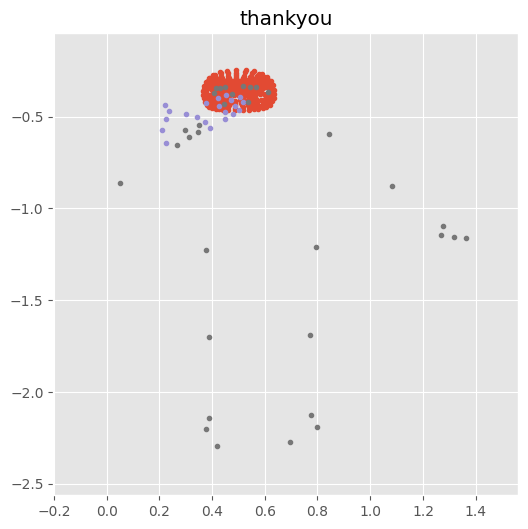

In [17]:
# Enable JavaScript-based animation rendering inside Jupyter
plt.rcParams["animation.html"] = "jshtml"


# Detect Dataset Directory

# Automatically detect the first folder inside Kaggle input
folders = os.listdir("/kaggle/input")
DATA_DIR = f"/kaggle/input/{folders[0]}"
print("Using DATA_DIR:", DATA_DIR)

# Load training metadata
train_df = pd.read_csv(f"{DATA_DIR}/train.csv")


# Select a Sign Sample

# Try selecting a specific sign
sign_name = "thankyou"

sample_rows = train_df[train_df["sign"] == sign_name]

# Fallback: if sign does not exist, use first available sign
if len(sample_rows) == 0:
    sign_name = train_df["sign"].iloc[0]
    sample_rows = train_df[train_df["sign"] == sign_name]

# Get path to corresponding parquet file
path_to_sign = sample_rows.iloc[0].path
print("Showing sign:", sign_name)

# Load landmark sequence
sign = pd.read_parquet(f"{DATA_DIR}/{path_to_sign}")

# Flip Y-axis to match typical Cartesian orientation
sign["y"] = sign["y"] * -1


# Define Graph Limits

# Add small margin around min/max values
xmin, xmax = sign.x.min() - 0.2, sign.x.max() + 0.2
ymin, ymax = sign.y.min() - 0.2, sign.y.max() + 0.2

fig, ax = plt.subplots(figsize=(6,6))


# Animation Function

def animation_frame(f):
    """
    Draw a single frame of the sign animation.
    """
    
    # Filter dataframe for current frame
    frame = sign[sign.frame == f]

    ax.clear()

    # Plot each body part separately
    for t in ['face','left_hand','right_hand','pose']:
        part = frame[frame.type == t]

        if len(part) > 0:
            ax.plot(part.x, part.y, '.')

    # Keep consistent axis limits across frames
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(sign_name)


# Get sorted frame numbers
frames = sorted(sign.frame.unique())

# Create animation
animation = FuncAnimation(fig, animation_frame, frames=frames, interval=50)

# Render animation in notebook
HTML(animation.to_jshtml())

In [18]:
# Enable JS-based animation rendering inside notebook
plt.rcParams["animation.html"] = "jshtml"



# Load Competition Data

# Auto-detect dataset directory inside Kaggle input
DATA_DIR = f"/kaggle/input/{os.listdir('/kaggle/input')[0]}"

# Load training metadata and set sequence_id as index
train_data = pd.read_csv(f"{DATA_DIR}/train.csv")
train_data = train_data.set_index("sequence_id")

# Canvas size for rendering frames
height = 800
width = 800


# Helper Functions

def get_random_sequence_id(train_data):
    """Return a random sequence_id from the dataset."""
    return random.choice(train_data.index.tolist())


def read_landmark_data_by_id(sequence_id, train_data):
    """Load parquet landmark data for a given sequence_id."""
    path = train_data.loc[sequence_id]["path"]
    df = pd.read_parquet(f"{DATA_DIR}/{path}")
    
    # Flip Y-axis for better visualization
    df["y"] *= -1
    return df


def create_frame(data, frame_id, height=800, width=800):
    """Render a single frame as an image (numpy array)."""
    
    frame = data[data.frame == frame_id]

    fig, ax = plt.subplots(figsize=(4,4))
    
    # Keep consistent axis limits across frames
    ax.set_xlim(data.x.min()-0.2, data.x.max()+0.2)
    ax.set_ylim(data.y.min()-0.2, data.y.max()+0.2)
    ax.axis("off")

    # Draw landmarks as colored points
    for t, color in zip(
        ['face','left_hand','right_hand','pose'],
        ['gray','red','blue','green']
    ):
        part = frame[frame.type == t]
        if len(part) > 0:
            ax.scatter(part.x, part.y, s=10, c=color)

    # Convert matplotlib figure to image array
    fig.canvas.draw()
    image = np.asarray(fig.canvas.buffer_rgba())
    plt.close(fig)

    return image


def create_frames(sequence_id, train_data, height=800, width=800):
    """Generate all frames for a given sequence."""
    
    data = read_landmark_data_by_id(sequence_id, train_data)
    frame_ids = sorted(data['frame'].unique())

    images = [
        create_frame(data, fid, height, width)
        for fid in frame_ids
    ]

    return np.array(images)


def create_animation(images, fig, ax):
    """Create matplotlib animation from image frames."""
    
    ax.axis('off')
    ims = []

    for img in images:
        im = ax.imshow(img, animated=True)
        ims.append([im])

    anim = mpl.animation.ArtistAnimation(
        fig,
        ims,
        interval=80,
        blit=True,
        repeat_delay=1000
    )

    return anim


def play_animation(sequence_id, train_data, height, width, figsize=(4,4)):
    """Render and display animation for a given sequence."""
    
    frames = create_frames(sequence_id, train_data, height, width)
    sign = train_data.loc[sequence_id]['sign']

    fig, ax = plt.subplots(figsize=figsize)
    anim = create_animation(frames, fig, ax)

    ax.set_title(f"Sign: {sign}")

    display(HTML(anim.to_jshtml()))
    plt.close()


# Run Animation

# Select random sequence
sequence_id = get_random_sequence_id(train_data)

print("Sequence ID:", sequence_id)
print("Sign:", train_data.loc[sequence_id]["sign"])

# Play animation
play_animation(sequence_id, train_data, height, width)

Sequence ID: 1954692375
Sign: elephant


In [19]:
# Enable JS animation rendering
plt.rcParams["animation.html"] = "jshtml"


# Load Data

# Auto-detect dataset directory
DATA_DIR = f"/kaggle/input/{os.listdir('/kaggle/input')[0]}"

# Load training metadata
train_df = pd.read_csv(f"{DATA_DIR}/train.csv")

# Select two signs to compare
sign_left  = "no"
sign_right = "yes"


# Helper Functions

def get_sequence_id(sign_name):
    """Return sequence_id and parquet path for a given sign."""
    sample = train_df[train_df["sign"] == sign_name]
    
    if len(sample) == 0:
        raise ValueError(f"Sign '{sign_name}' not found")
    
    return sample.iloc[0]["sequence_id"], sample.iloc[0]["path"]


def load_landmarks(path):
    """Load landmark parquet file and flip Y-axis."""
    df = pd.read_parquet(f"{DATA_DIR}/{path}")
    df["y"] *= -1
    return df


# Get sequence info
seq1, path1 = get_sequence_id(sign_left)
seq2, path2 = get_sequence_id(sign_right)

# Load landmark data
data1 = load_landmarks(path1)
data2 = load_landmarks(path2)


# Create Frame (Side-by-Side)

def create_frame(d1, d2, fid1, fid2):
    """Render one frame from each sign side-by-side."""
    
    fig, axes = plt.subplots(1, 2, figsize=(6,3))

    for ax, data, fid, title in zip(
        axes,
        [d1, d2],
        [fid1, fid2],
        [sign_left, sign_right]
    ):
        frame = data[data.frame == fid]

        ax.axis("off")
        ax.set_xlim(data.x.min()-0.2, data.x.max()+0.2)
        ax.set_ylim(data.y.min()-0.2, data.y.max()+0.2)

        # Draw landmarks as colored points
        for t, color in zip(
            ['face','left_hand','right_hand','pose'],
            ['gray','red','blue','green']
        ):
            part = frame[frame.type == t]
            if len(part) > 0:
                ax.scatter(part.x, part.y, s=8, c=color)

        ax.set_title(title)

    # Convert matplotlib figure to image array
    fig.canvas.draw()
    img = np.asarray(fig.canvas.buffer_rgba())
    plt.close(fig)

    return img


# Get sorted frame IDs
frames1 = sorted(data1.frame.unique())
frames2 = sorted(data2.frame.unique())

# Match shortest sequence length
max_len = min(len(frames1), len(frames2))

# Generate frame images
images = [
    create_frame(data1, data2, frames1[i], frames2[i])
    for i in range(max_len)
]


# Create Animation

fig, ax = plt.subplots()
ax.axis("off")

ims = []
for img in images:
    im = ax.imshow(img, animated=True)
    ims.append([im])

anim = mpl.animation.ArtistAnimation(
    fig,
    ims,
    interval=80,
    blit=True,
    repeat_delay=1000
)

display(HTML(anim.to_jshtml()))
plt.close()

# Observations on Selected Signs

In this section, we analyze the motion patterns of the following signs:

- **thankyou**
- **no**
- **yes**
- **find**

The observations are based on landmark movement across frames (hands, face, and pose).

---

### 🔹 1. Sign: *thankyou*

**Motion Characteristics:**
- The movement typically starts near the chin or mouth area.
- The dominant hand moves outward away from the face.
- The face remains mostly stable.
- Motion is primarily concentrated in the right hand.

**Data Insights:**
- Noticeable displacement in the hand landmarks along the x-axis.
- Minimal variation in body pose.
- Clear directional movement pattern.

**Modeling Insight:**
- Temporal modeling is essential.
- A single frame is insufficient for classification.
- Motion-based features (velocity or displacement) could improve performance.

---

### 🔹 2. Sign: *no*

**Motion Characteristics:**
- Very small and compact movement.
- Motion is mostly in finger joints.
- Limited spatial displacement.

**Data Insights:**
- Low variance in landmark coordinates.
- Subtle changes between consecutive frames.
- Minimal body movement.

**Modeling Insight:**
- Harder to classify due to small motion amplitude.
- Requires high-resolution temporal modeling.
- Fine-grained hand features are important.

---

### 🔹 3. Sign: *yes*

**Motion Characteristics:**
- Repetitive vertical hand motion.
- Clear oscillation pattern.
- Moderate amplitude movement.

**Data Insights:**
- Strong variation along the y-axis.
- Periodic motion pattern.
- Slight shoulder involvement in pose landmarks.

**Modeling Insight:**
- Frequency-based motion features could help.
- Easier to distinguish than "no" due to larger movement.

---

### 🔹 4. Sign: *pencil*

**Motion Characteristics:**
- More complex movement involving both hands.
- Larger spatial coverage.
- Coordinated multi-joint motion.

**Data Insights:**
- Higher variance in both x and y axes.
- Strong interaction between left and right hands.
- More pose engagement.

**Modeling Insight:**
- Requires modeling spatial + temporal relationships.
- Transformer-based architectures may capture this better than simple RNNs.

---

##  Comparative Summary

| Sign       | Motion Size | Complexity | Temporal Importance |
|------------|------------|------------|---------------------|
| thankyou   | Medium     | Moderate   | High                |
| no         | Small      | Low        | Very High           |
| yes        | Medium     | Repetitive | High                |
| find       | Large      | Complex    | Very High           |

---

###  Key Takeaways

- Hand landmarks are the most informative features.
- Small-motion signs (e.g., *no*) are more challenging to classify.
- Temporal modeling is critical for all signs.
- Static frame classification is insufficient for accurate recognition.

# Final Remarks
<br>

<a id="ASL"></a><br><b style="text-decoration: underline; font-family: Verdana; font-size: 120%; text-transform: uppercase;">American Sign Language (ASL)</b>

American Sign Language (ASL) is a complete and natural language used primarily by the Deaf community in North America.  
It has its own unique grammar, syntax, and vocabulary, and it is completely separate from English.

ASL is a visual-gestural language, meaning it relies on:

- Hand movements  
- Facial expressions  
- Body language  

ASL developed more than 200 years ago, influenced by local sign systems and French Sign Language (LSF).  
Early exposure to language (signed or spoken) is critical for proper cognitive, social, and linguistic development.

<br>

<b><sub>Cute Animated ASL GIF ...</sub></b>

<img src="https://media0.giphy.com/media/1xVfziksXMFBhe0weN/200w.gif?cid=82a1493b2jwtrnketklxa6jseau5xwv0ry3yxuasxufy7xtt&rid=200w.gif&ct=g">

<br>

---

<br>

<a id="mediapipe"></a><br><b style="text-decoration: underline; font-family: Verdana; font-size: 120%; text-transform: uppercase;">MediaPipe Holistic Solution</b>

MediaPipe Holistic is an open-source framework that performs real-time detection and tracking of:

- Body pose  
- Face landmarks  
- Hand landmarks  

It provides a unified topology of 540+ keypoints using multiple coordinated machine learning models.  
The pipeline is optimized for mobile and desktop devices and enables applications such as:

- Sign language recognition  
- Gesture control  
- Sports analytics  
- Augmented reality systems  

<br>

<b><sub>Example of MediaPipe Holistic</sub></b>

<img src="https://mediapipe.dev/images/mobile/holistic_sports_and_gestures_example.gif">

<br>

<b><sub>MediaPipe Landmarks for Hands</sub></b>

<img src="https://mediapipe.dev/images/mobile/hand_landmarks.png">

<br>

---





##### Thanks 